In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set()

We begin by reading the data and summarizing the variables.

In [4]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0901.csv'
df = pd.read_csv(path)
df.head()

,Flowers,Time,Intensity
0,62.3,1,150
1,77.4,1,150
2,55.3,1,300
3,54.2,1,300
4,49.6,1,450


In [5]:
summary = df.describe()
summary

,Flowers,Time,Intensity
count,24.000000,24.000000,24.000000
mean,56.137500,1.500000,525.000000
std,13.733387,0.510754,261.683513
min,31.300000,1.000000,150.000000
25%,45.425000,1.000000,300.000000
50%,54.750000,1.500000,525.000000
75%,64.450000,2.000000,750.000000
max,78.000000,2.000000,900.000000


Text(0.5, 0, 'Light Intensity ($\\mu\\mathrm{mol/m^2/sec}$)')

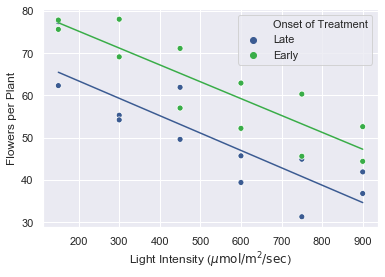

In [21]:
df.loc[df.Time == 2, 'Onset of Treatment'] = 'Early'  
df.loc[df.Time == 1, 'Onset of Treatment'] = 'Late'  

colors = ["denim blue", "medium green"]
palette = sns.xkcd_palette(colors)

fig, ax = plt.subplots()
sns.scatterplot(x='Intensity', y='Flowers', hue='Onset of Treatment', palette=palette, data=df, ax=ax)

for (time, grp), color in zip(df.groupby('Time'), palette):
    model = smf.ols('Flowers ~ Intensity', data=grp)
    results = model.fit()
    ax.plot(grp['Intensity'], results.fittedvalues, color=color)
    
ax.set_ylabel('Flowers per Plant')
ax.set_xlabel('Light Intensity ($\mu\mathrm{mol/m^2/sec}$)')
    

The display above shows the fit of a multiple linear regression model that specifies parallel regression lines for the mean number of flowers as functions of light intensity.  Increasing light intensity decreased the mean number of flowers per plant by an estimated 4.0 flowers per plant per 100 $\mu\mathrm{mol/m^2/sec}$ (95% confidence interval from 3.0 to 5.1).  Beginning the light treatments 24 days prior to PFI increased the mean number of flowers from 6.7 to 17.6).  The data provide no evidence that the effect of light intensity depends on the timing of its initiation (two-sided p-value = 0.91, from a $t$-test for interaction, 20 degrees of freedom).